In [28]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

### Regression Lineaire

In [29]:
def mse(W, X, Y):
    """
    Compute MSE, mean square error, cost function of linear regression

    parameters : 
        - W : np.ndarray of shape (d, 1), weights
        - X : np.ndarray of shape (n, d), data
        - Y : np.ndarray of shape (n, 1), label corresponding to data X

    returns : 
        - mse : np.ndarray of shape (n, 1), the mse 
    """
    mse = np.square((np.dot(X, W) - Y))

    return mse

In [30]:
def mse_grad(W, X, Y):
    """
    Compute the gradient of mse for each point of X

    parameters : 
        - W : np.ndarray of shape (d,), weights
        - X : np.ndarray of shape (n, d), data
        - Y : np.ndarray of shape (n,), label corresponding to data X

    returns :
        - grad_mse : np.ndarray of shape(n, d) the gradient of the mse for each point of X
    """
    grad_mse = 2*X * (X @ W - Y) 
     
    return grad_mse

### Regression logistique

In [31]:
def reglog(W, X, Y):
    """
    Compute cost function of logistic regression : -log likelihood = 1+exp(-ywx)

    parameters : 
        - W : np.ndarray of shape (d,), weights
        - X : np.ndarray of shape (x, d), data
        - Y : np.ndarray of shape (x,), label corresponding to data X

    returns :
        - LL : np.ndarray of shape (n, 1)
    """
    # Compute loglikelihood log(P(Y|X))
    LL = np.log(1+np.exp(-Y*X@W))

    return LL

In [32]:
def reglog_grad(W, X, Y):
    """
    Compute gradient of cost function of logistic regression

    parameters : 
        - W : np.ndarray of shape (d,), weights
        - X : np.ndarray of shape (x, d), data
        - Y : np.ndarray of shape (x,), label corresponding to data X

    returns :
        - grad : np.ndarray of shape (n, 1)
    """
    # Compute derivative of -loglikelihood (cost function of logistic regression)
    grad = -Y*X/(1+np.exp(Y*X@W))
    return grad # a tester

In [33]:
def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
    assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
    assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
    np.random.seed()

# Test

### Test d'exécution des fonctions implémentées

In [61]:
## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
w  = np.random.randn(datax.shape[1],1)

# test reglin
# print(datax.shape, datay.shape, w.shape)# X=(n,d), Y=(n, 1) W=(d, 1) OK
# print(mse(w,datax,datay).shape) # returns mse = (n,1)
# # print(mse_grad(w, datax, datay)) # returns grad (n, d)

# # # test reglog
# print(reglog(w, datax, datay)) # returns LL = (n, 1)
# print(reglog_grad(w, datax, datay)) # returns grad (n, d)

### Test regression linéaire

Rappel regression linéaire  
But = Prédiction de valeurs continues  
-> Sortie = une droite Y (valeur continue)

Etapes  
1) Creer données
2) Definir fonction de coût = erreur (MSE)
3) Optimisation : trouver les w qui minimisent la MSE 
-> methode analytique(calcul du gradient)  
-> descente de gradient (calculer le gradient jusqu'à convergence)

In [64]:
def descente_gradient_reg_lin(learning_rate:float=2., n_iter_max:int=50)->np.ndarray[float]:
    # Creation d'un jeu de données
    datax, datay = gen_arti(epsilon=0.1)
    w  = np.random.randn(datax.shape[1],1)
    plot_data(datax,datay)

    # Discretisation de l'espace 2D en une grille
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

    # Optimisation
    # Initialisation
    for i in range(n_iter_max) :
        # Gradient de cost function (MSE)
        grad = mse_grad(w, datax, datay)

        # Mise à jour de w ?
        new_w = w-learning_rate*grad

        # Verification de convergence
        if np.allclose(w, new_w, 1e-10) :
            return new_w # Convergence
        else :
            w = new_w # Mise à jour

    return new_w


ValueError: operands could not be broadcast together with shapes (2,1) (1000,2) 

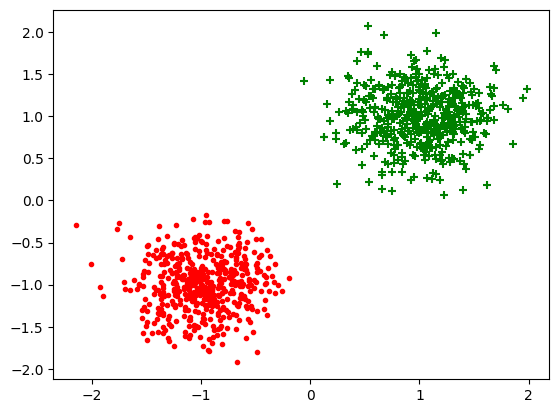

In [65]:
w = descente_gradient_reg_lin()

### Test régression logistique

Rappel regression logistique  
But = Classification des données en k classes   
-> Pour chaque classe k, obtenir la proba qu'un set de données appartenienne à k

Etapes  
1) Creer données
2) Definir fonction de coût = entropie croisée (log-loss)
3) Optimisation : trouver les w qui minimisent la fonction de coût  
-> methode analytique(calcul du gradient)  
-> descente de gradient

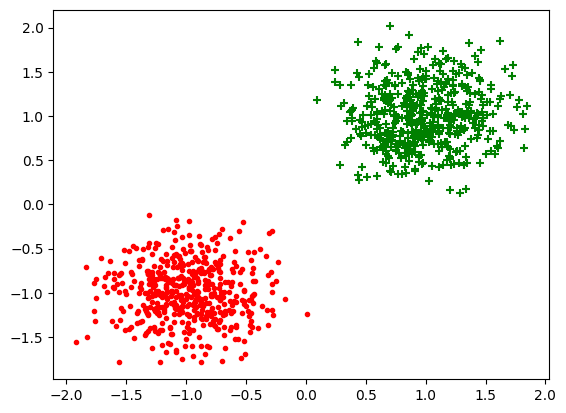

In [59]:
# Creation d'un jeu de données
datax, datay = gen_arti(epsilon=0.1)
plot_data(datax,datay)
w  = np.random.randn(datax.shape[1],1)

# Discretisation de l'espace 2D en une grille
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)




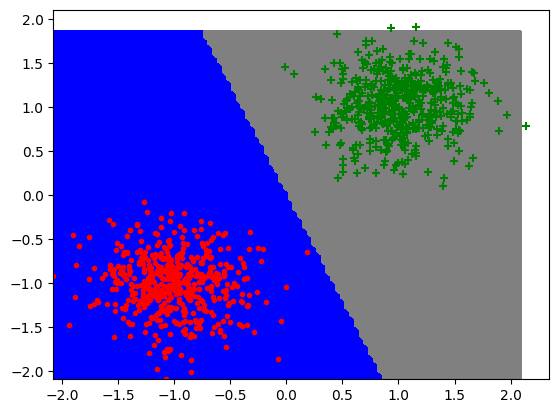

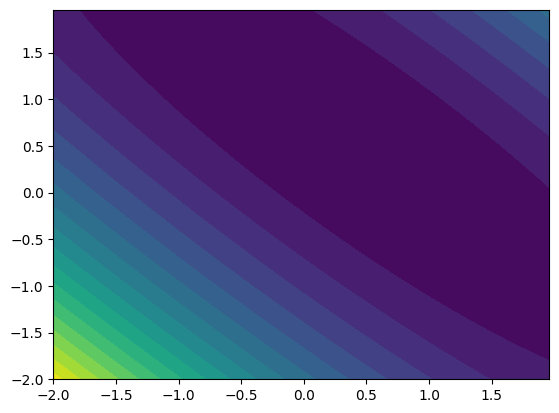

In [58]:
if __name__=="__main__":
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=0.1)
    
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

    plt.figure()

    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w  = np.random.randn(datax.shape[1],1)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
    plot_data(datax,datay)

    
    
    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    mse_calc = [mse(w.reshape(2,1),datax,datay).mean() for w in grid]
    plt.contourf(x_grid,y_grid,np.array(mse_calc).reshape(x_grid.shape),levels=20)
    # J'ai ajouté le reshape sur w pour qu'il corresponde bien à un vecteur de shape(d,1) comme attendu dans mse()